In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np


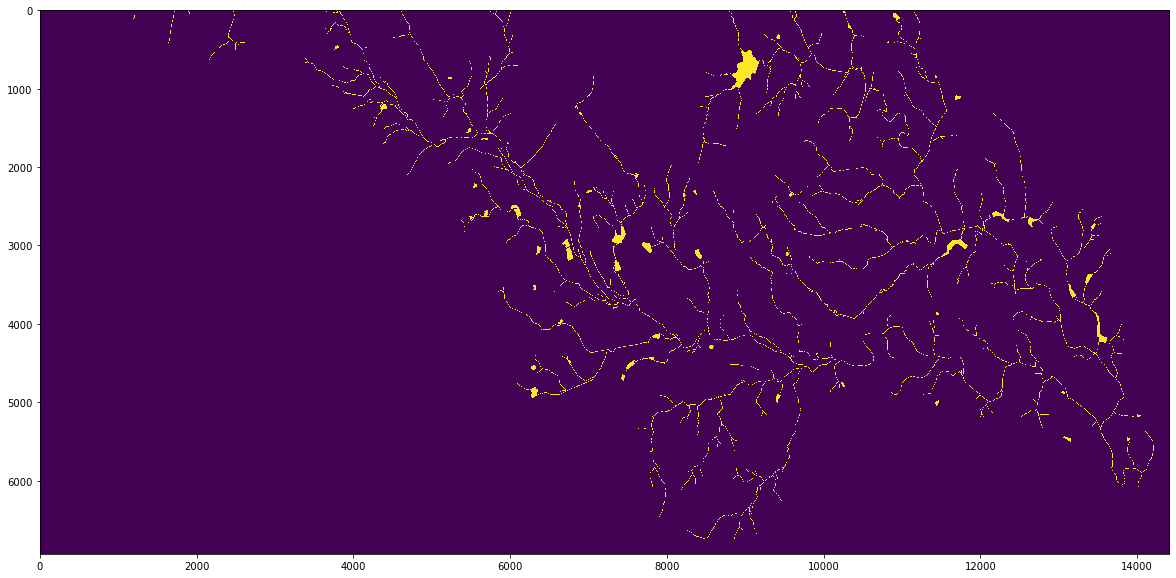

In [3]:

groundtruthlist = np.load('../Covington_data/Total_data/bottom_half_test_label.npy')
fig= plt.figure(figsize=(25,10))
plt.imshow(groundtruthlist, interpolation='nearest')
plt.show()

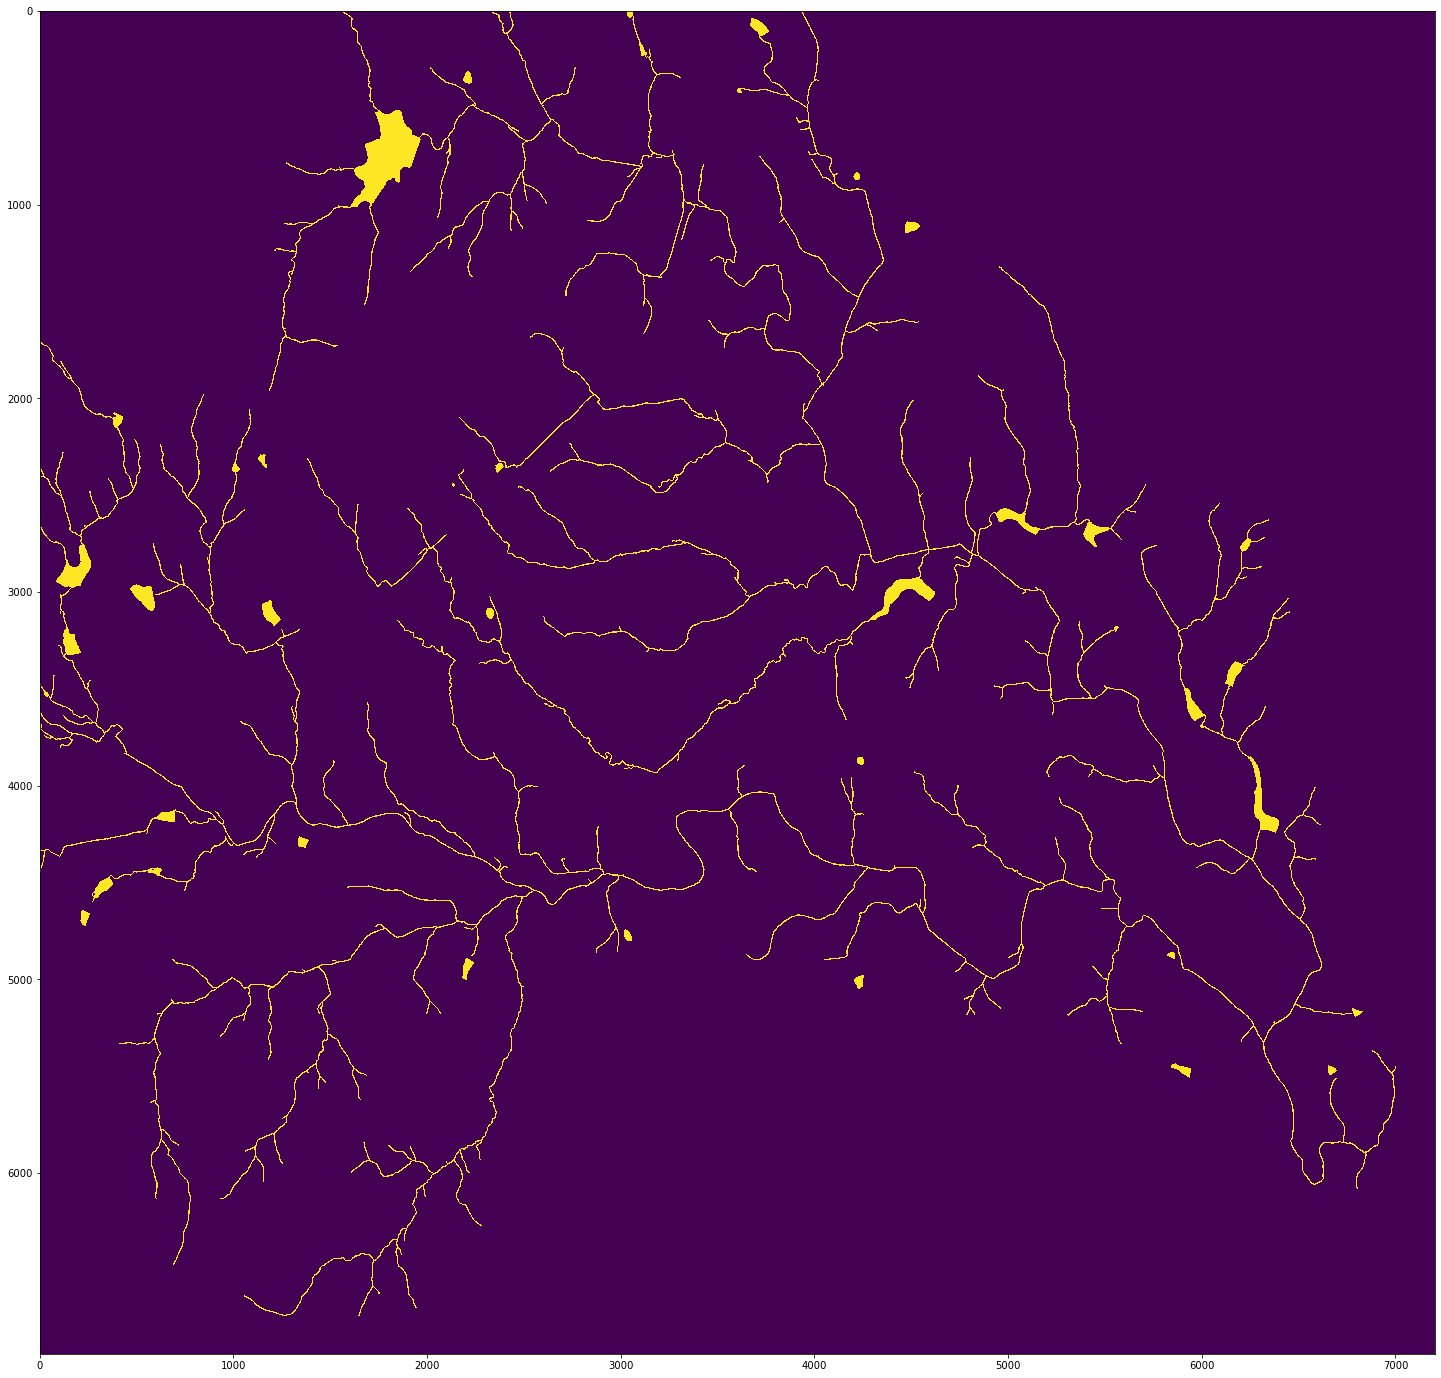

In [10]:

groundtruthlist = np.load('../Covington_data/Total_data/reference_nodata_as_0.npy')
fig= plt.figure(figsize=(25,50))
plt.imshow(groundtruthlist[groundtruthlist.shape[0]//2:,groundtruthlist.shape[1]//2:], interpolation='nearest')
plt.show()

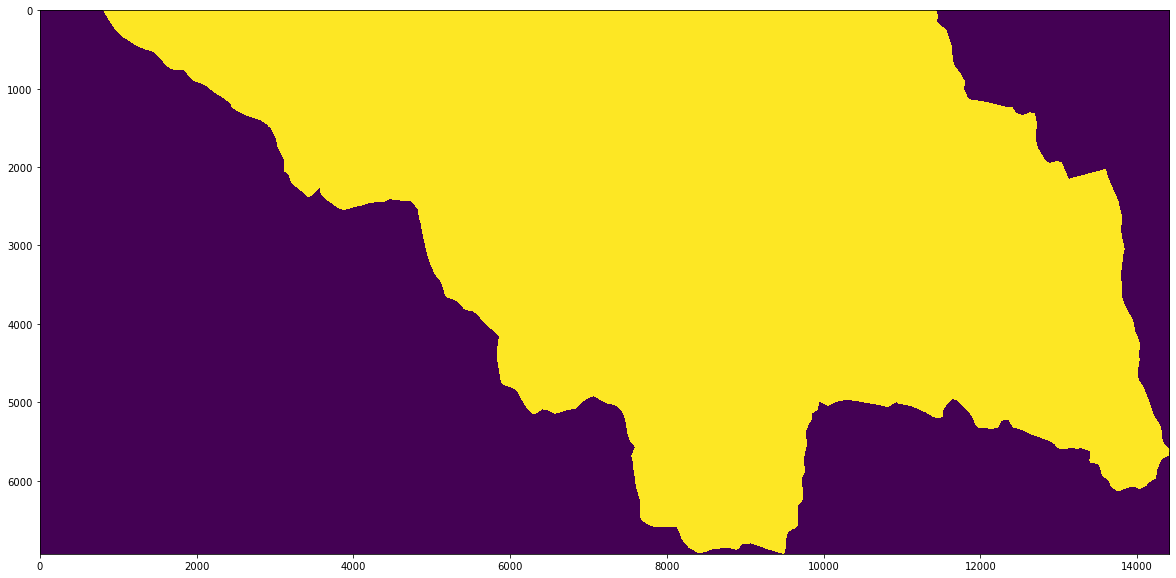

In [21]:
mask = np.load('../Covington_data/Total_data/bottom_half_test_mask.npy')
fig= plt.figure(figsize=(25,10))
plt.imshow(mask, interpolation='nearest')
plt.show()

# 400 samples round 2

320


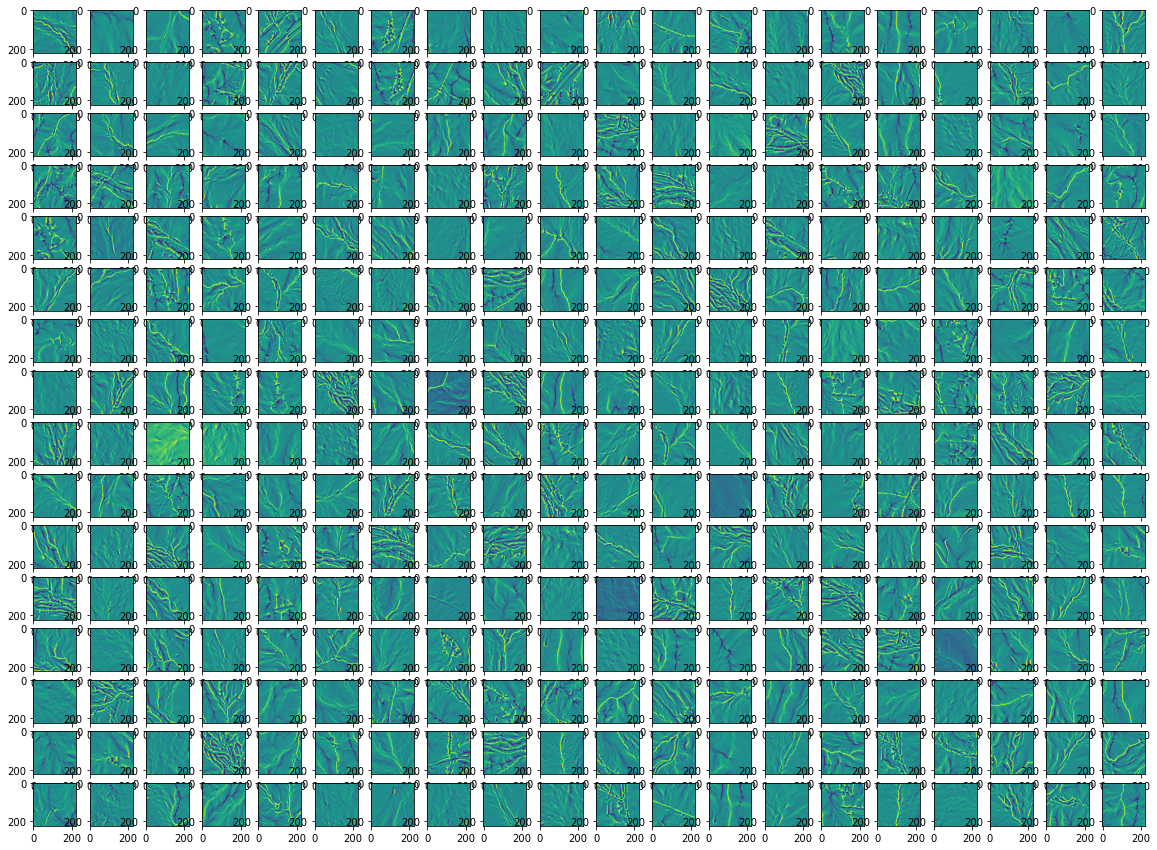

In [3]:
mask = np.load('./samples/400/2/train_data.npy')
# mask = np.load('./samples/400/2/vali_label.npy')
print(len(mask))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(mask)//20,20, figsize=(20,15))
for i,ax in enumerate(axes.flat):
    ax.imshow(mask[i, :, :, 0])

320


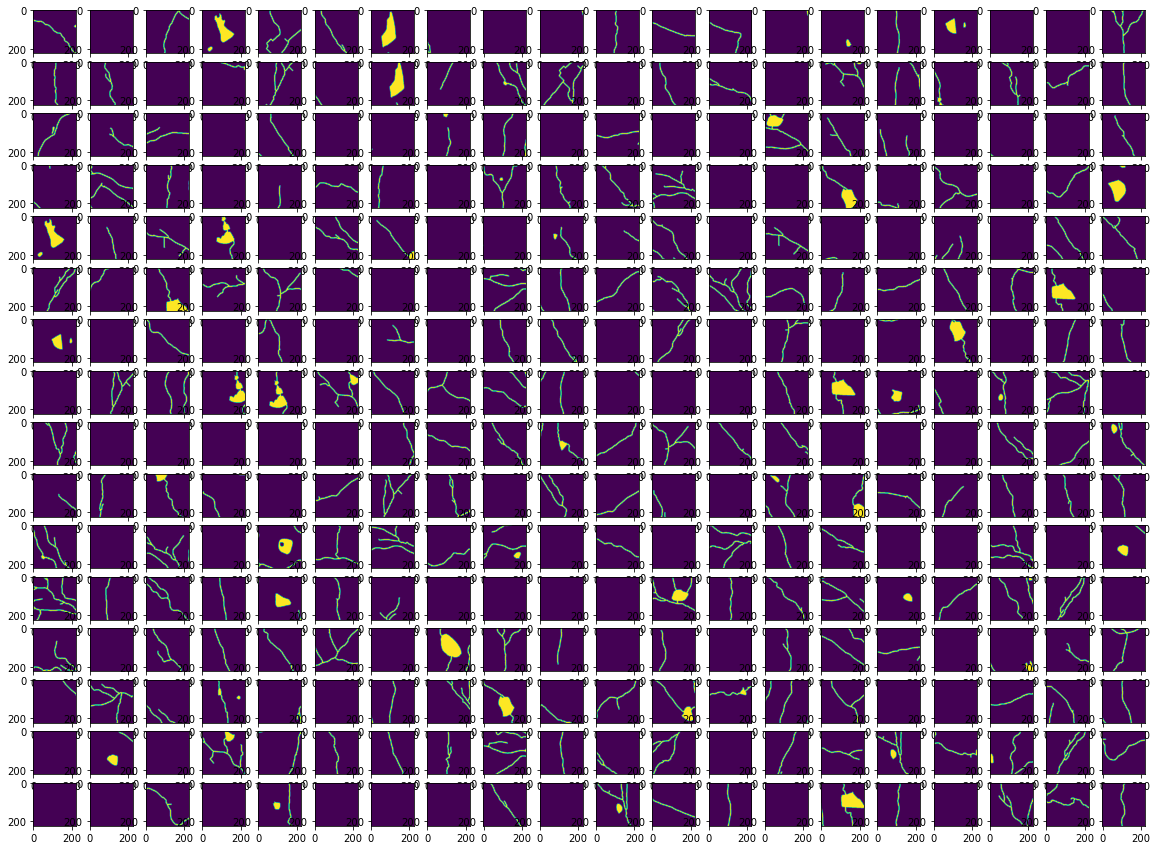

In [4]:
mask = np.load('./samples/400/2/train_label.npy')
# mask = np.load('./samples/400/2/vali_label.npy')
print(len(mask))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(mask)//20,20, figsize=(20,15))
for i,ax in enumerate(axes.flat):
    ax.imshow(mask[i, :, :, 0])

80


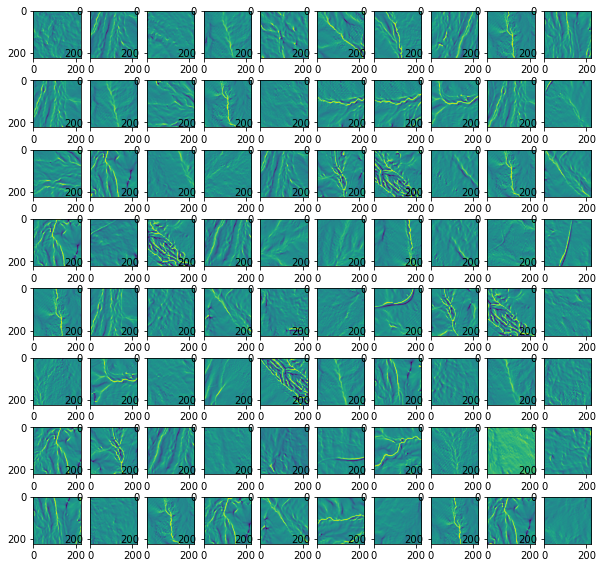

In [5]:
# mask = np.load('./samples/200/1/train_label.npy')
mask = np.load('./samples/400/2/vali_data.npy')
print(len(mask))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(mask)//10,10, figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(mask[i, :, :, 0])

80


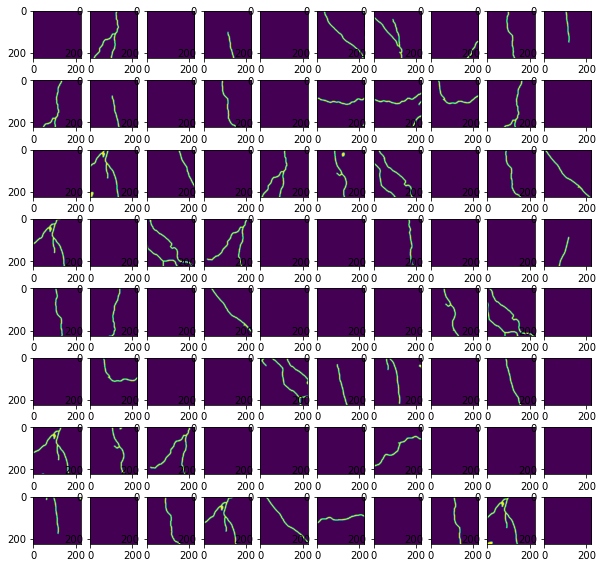

In [37]:
# mask = np.load('./samples/200/1/train_label.npy')
mask = np.load('./samples/400/2/vali_label.npy')
print(len(mask))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(mask)//10,10, figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(mask[i, :, :, 0])

# 100 samples round 3

80


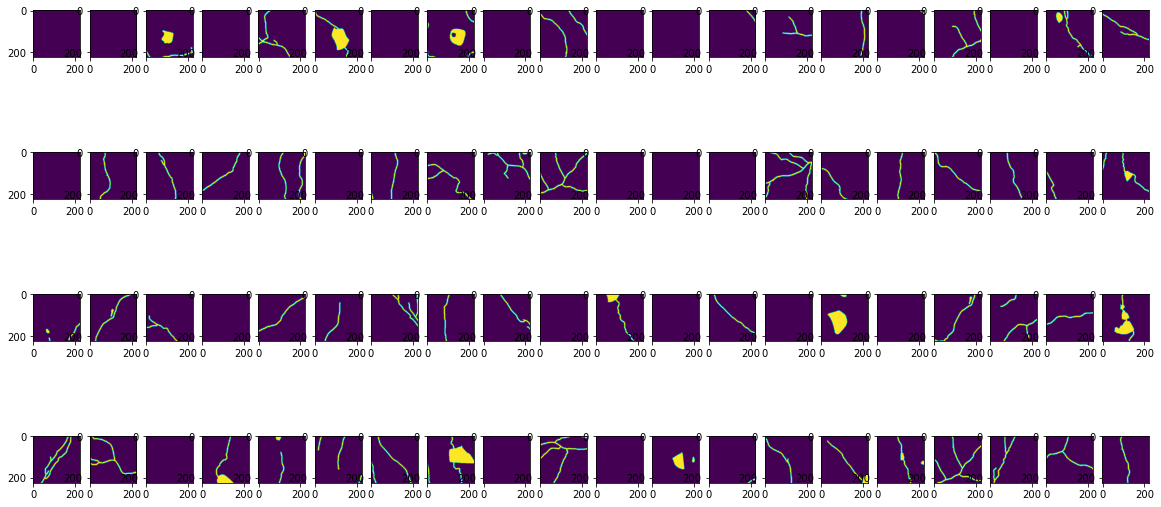

In [16]:
mask = np.load('./samples/100/3/train_label.npy')
# mask = np.load('./samples/400/2/vali_label.npy')
print(len(mask))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(mask)//20,20, figsize=(20,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(mask[i, :, :, 0])

20


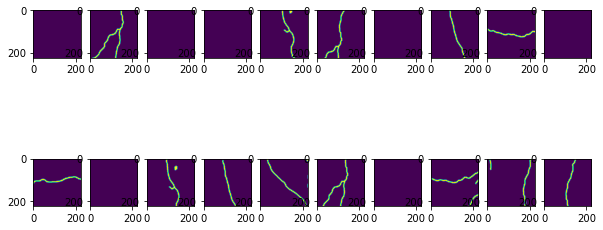

In [15]:
# mask = np.load('./samples/200/1/train_label.npy')
mask = np.load('./samples/100/3/vali_label.npy')
print(len(mask))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(mask)//10,10, figsize=(10,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(mask[i, :, :, 0])

In [15]:
prediction = np.load('./Prediction_results/200\prediction_result__train_from_scratch_No_NAIP_200_samples_r7_.npy')
print(prediction.shape)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(20,37+5, figsize=(224,150))
for i,ax in enumerate(axes.flat):
    ax.imshow(prediction[i, :, :, 0])

(1764, 224, 224, 1)


rows: 84 columns: 87
row:  15 column:  41 count 629


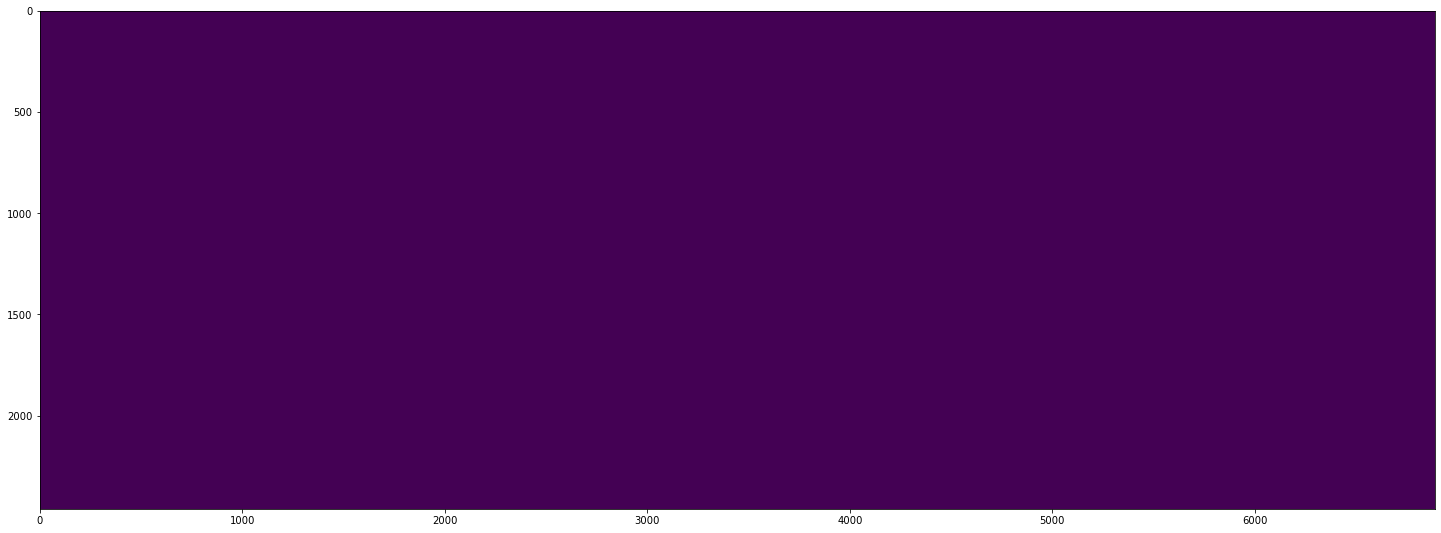

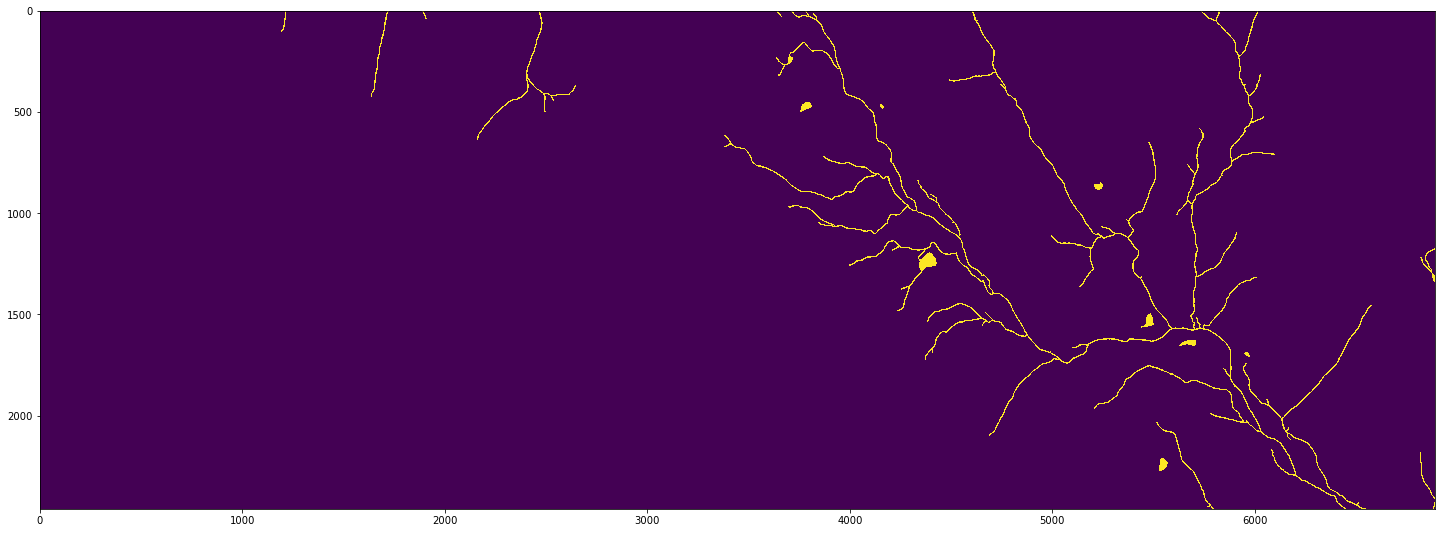

In [20]:
import copy
import random
import sys
import numpy as np
from sklearn.metrics import f1_score, precision_score,recall_score
import glob
# print("working on:",path)
buf =30
# #prediction model from scratch
preds_test_mod = np.load('./Prediction_results/new_test_data/300\prediction_result__fine_tuning_No_NAIP_300_samples_r3_.npy')
# print("preds_test_mod",preds_test_mod.shape)

dim = np.load('../Covington_data/Total_data/reference_nodata_as_0.npy').shape
numr = dim[0]//(224 - buf*2)
numc = dim[1]//(224 - buf*2)

print("rows:", numr , "columns:", numc)
count = -1
for i in range(numr):

    if(i == 15):
        print("row: ",i,"column: ",j, "count", count)
        break 

    for j in range(int(numc/2)-1):
        count += 1    
        temp = preds_test_mod[count][buf:-buf,buf:-buf]
        if j == 0:
            rows = temp
        else:
            rows = np.concatenate((rows,temp),axis = 1)

    if i == 0:
        prediction_map = copy.copy(rows)
    else:
        prediction_map = np.concatenate((prediction_map,rows),axis = 0)

prediction_map = prediction_map[:,:,0]
mask = np.load('../Covington_data/Total_data/bottom_half_test_mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]

fig= plt.figure(figsize=(25,10))
plt.imshow(np.logical_and(prediction_map,mask), interpolation='nearest')
plt.show()

reference_mask = np.load('../Covington_data/Total_data/bottom_half_test_label.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
fig= plt.figure(figsize=(25,10))
plt.imshow(reference_mask, interpolation='nearest')
plt.show()

In [6]:
import copy
import random
import sys
import numpy as np
from sklearn.metrics import f1_score, precision_score,recall_score
import glob
# print("working on:",path)
buf =30
# #prediction model from scratch
preds_test_mod = np.load('../prediction_results/prediction_result__fine_tuning_No_NAIP_90_samples_r5_.npy')
# print("preds_test_mod",preds_test_mod.shape)

dim = np.load('../Covington_data/Total_data/reference_nodata_as_0.npy').shape
numr = dim[0]//(224 - buf*2)
numc = dim[1]//(224 - buf*2)

print("rows:", numr , "columns:", numc)
count = -1
for i in range(numr):

#     if(i == 15):
#         print("row: ",i,"column: ",j, "count", count)
#         break 

    for j in range(numc):
        count += 1    
        temp = preds_test_mod[count][buf:-buf,buf:-buf]
        if j == 0:
            rows = temp
        else:
            rows = np.concatenate((rows,temp),axis = 1)

    if i == 0:
        prediction_map = copy.copy(rows)
    else:
        prediction_map = np.concatenate((prediction_map,rows),axis = 0)

prediction_map = prediction_map[:,:,0]
mask = np.load('../Covington_data/Total_data/mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]


fig= plt.figure(figsize=(224,150))
plt.imshow(np.logical_and(prediction_map,mask), interpolation='nearest')
plt.show()

rows: 84 columns: 87


# 100 Samples Round 1

80


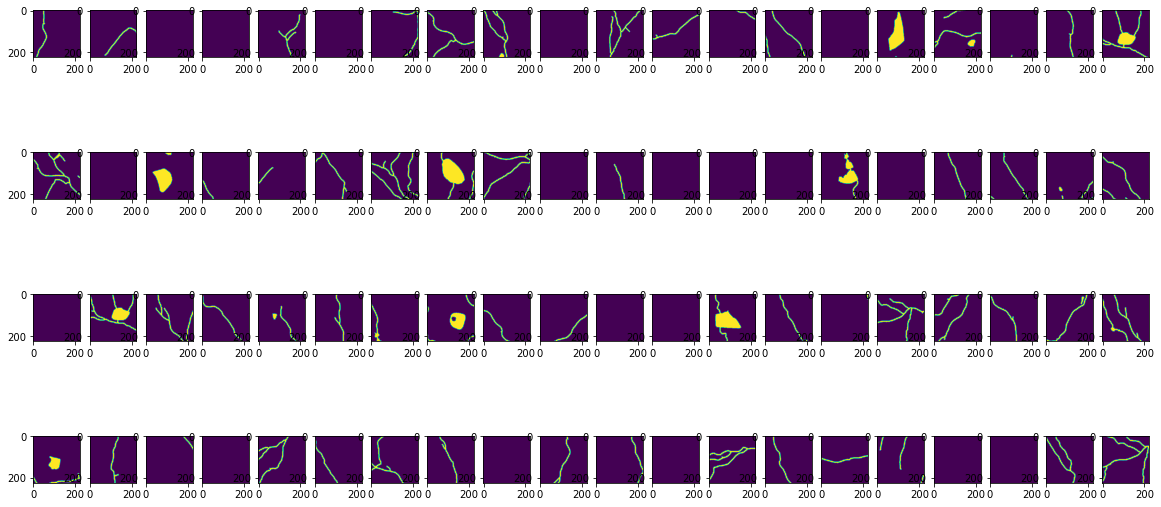

In [18]:
mask = np.load('./samples/100/1/train_label.npy')
# mask = np.load('./samples/400/2/vali_label.npy')
print(len(mask))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(mask)//20,20, figsize=(20,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(mask[i, :, :, 0])

20


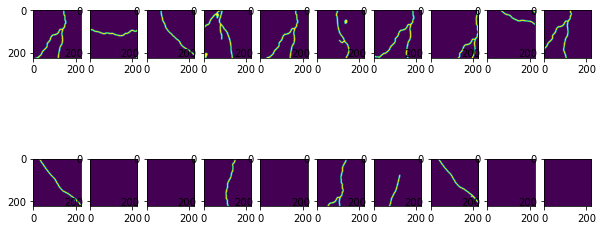

In [17]:
# mask = np.load('./samples/200/1/train_label.npy')
mask = np.load('./samples/100/1/vali_label.npy')
print(len(mask))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(mask)//10,10, figsize=(10,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(mask[i, :, :, 0])

rows: 84 columns: 87
row:  15 column:  41 count 629
(2460, 6888)


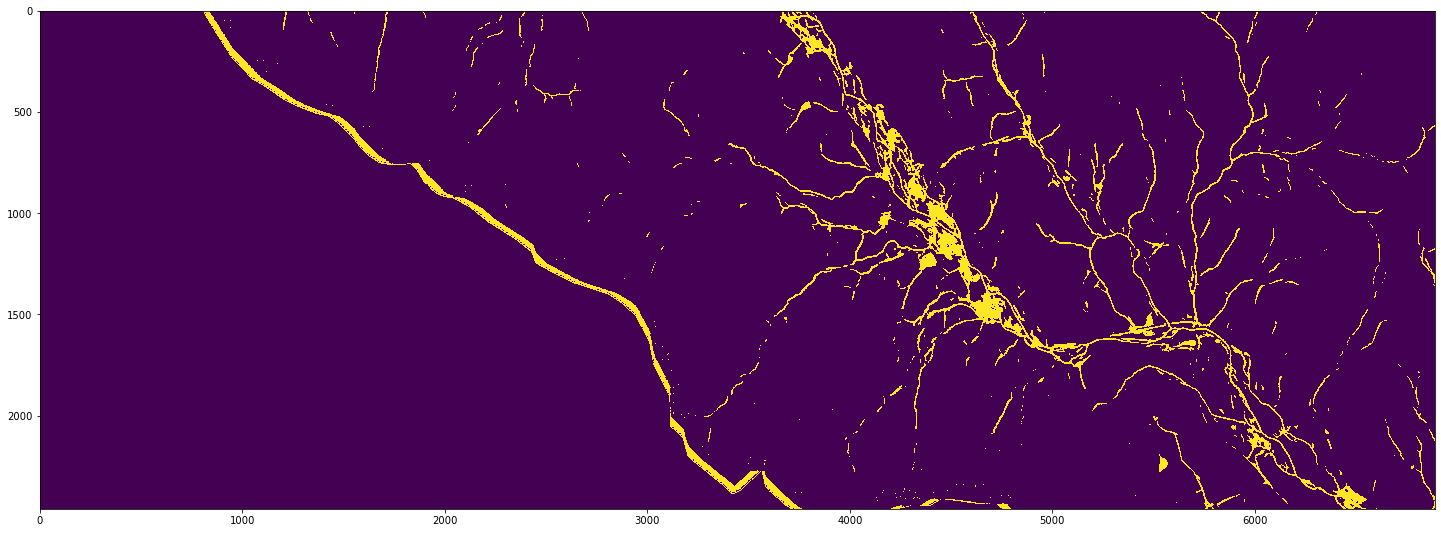

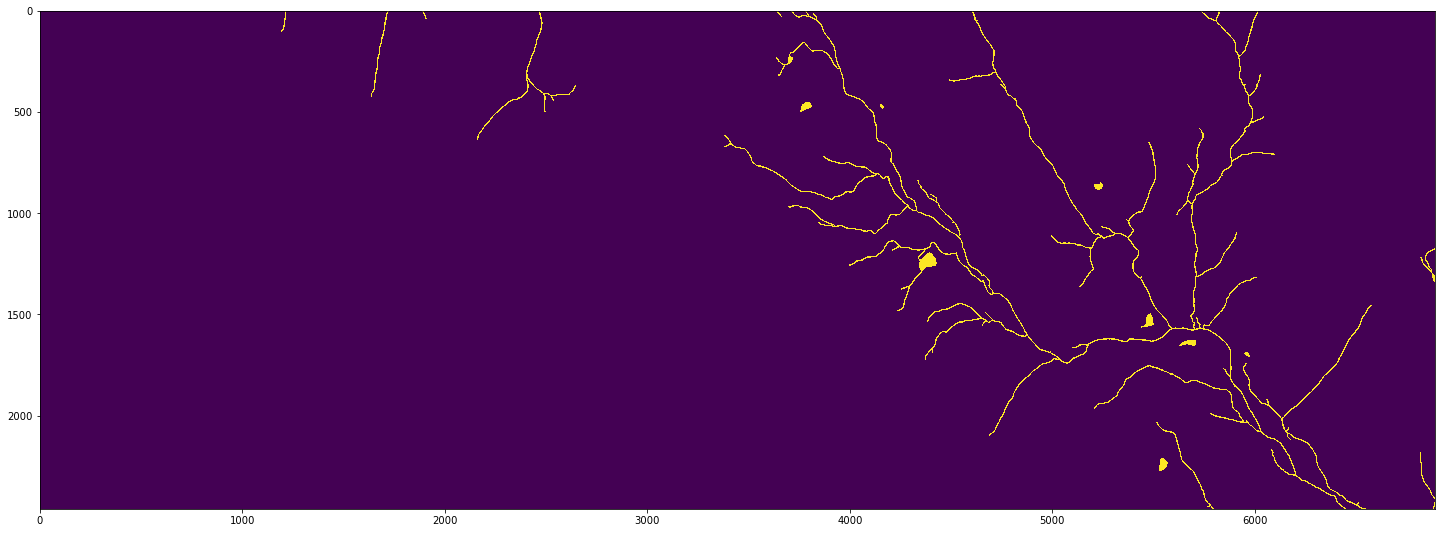

In [64]:
%matplotlib inline 
from matplotlib import pyplot as plt
import copy
import random
import sys
import numpy as np
from sklearn.metrics import f1_score, precision_score,recall_score
import glob

# print("working on:",path)
buf =30
# #prediction model from scratch
preds_test_mod = np.load('./Prediction_results/new_test_data/10/prediction_result__fine_tuning_No_NAIP_10_samples_r3_.npy')
# print("preds_test_mod",preds_test_mod.shape)

dim = np.load('../Covington_data/Total_data/reference_nodata_as_0.npy').shape
numr = dim[0]//(224 - buf*2)
numc = dim[1]//(224 - buf*2)

print("rows:", numr , "columns:", numc)
count = -1
for i in range(numr):

    if(i == 15):
        print("row: ",i,"column: ",j, "count", count)
        break 

    for j in range(int(numc/2)-1):
        count += 1    
        temp = preds_test_mod[count][buf:-buf,buf:-buf]
        if j == 0:
            rows = temp
        else:
            rows = np.concatenate((rows,temp),axis = 1)

    if i == 0:
        prediction_map = copy.copy(rows)
    else:
        prediction_map = np.concatenate((prediction_map,rows),axis = 0)

prediction_map = prediction_map[:,:,0]
mask = np.load('../Covington_data/Total_data/bottom_half_test_mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]

print(np.logical_and(prediction_map,mask).shape)

fig= plt.figure(figsize=(25,10))
plt.imshow(np.logical_and(prediction_map,mask), interpolation='nearest')
plt.show()

reference_mask = np.load('../Covington_data/Total_data/bottom_half_test_label.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
fig= plt.figure(figsize=(25,10))
plt.imshow(reference_mask, interpolation='nearest')
plt.show()

# np.save('./Prediction_results/new_test_data/img/reference.npy', reference_mask)



# Organize and save prediction result and img

In [131]:
import copy
import random
import sys
import numpy as np
from sklearn.metrics import f1_score, precision_score,recall_score
from PIL import Image
import os

import glob
buf =30

reference_mask = np.load('./Prediction_results/new_test_data/img/remove_border_mask.npy')

for sample_size in range(200,510,100):
    
    preds_test_mod = glob.glob('./Prediction_results/new_test_data/'+str(sample_size)+'/*.npy')
    
    if not os.path.exists('./Prediction_results/new_test_data/img/'+str(sample_size)+'/'):
        os.makedirs('./Prediction_results/new_test_data/img/'+str(sample_size)+'/')
    
    for path in preds_test_mod:
        
        name = os.path.basename(path)[:-4]
        print(name)
        
        save_path = './Prediction_results/new_test_data/img/'+str(sample_size)+'/'+name
                
        if os.path.exists(save_path):
            print("exists")
            continue;
        

        preds_test_mod = np.load(path)
        # print("preds_test_mod",preds_test_mod.shape)

        dim = np.load('../Covington_data/Total_data/reference_nodata_as_0.npy').shape
        numr = dim[0]//(224 - buf*2)
        numc = dim[1]//(224 - buf*2)

        count = -1
        for i in range(numr):

            if(i == 15):
                break 

            for j in range(int(numc/2)-1):
                count += 1    
                temp = preds_test_mod[count][buf:-buf,buf:-buf]
                if j == 0:
                    rows = temp
                else:
                    rows = np.concatenate((rows,temp),axis = 1)

            if i == 0:
                prediction_map = copy.copy(rows)
            else:
                prediction_map = np.concatenate((prediction_map,rows),axis = 0)

        prediction_map = prediction_map[:,:,0]
        mask = np.load('../Covington_data/Total_data/bottom_half_test_mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
        
        masked_results = np.logical_and(prediction_map,mask)
        masked_results[reference_mask==1] = 0
        
        np.save(save_path,masked_results)
        
      

prediction_result__fine_tuning_No_NAIP_200_samples_r10_
prediction_result__fine_tuning_No_NAIP_200_samples_r1_
prediction_result__fine_tuning_No_NAIP_200_samples_r2_
prediction_result__fine_tuning_No_NAIP_200_samples_r3_
prediction_result__fine_tuning_No_NAIP_200_samples_r4_
prediction_result__fine_tuning_No_NAIP_200_samples_r5_
prediction_result__fine_tuning_No_NAIP_200_samples_r6_
prediction_result__fine_tuning_No_NAIP_200_samples_r7_
prediction_result__fine_tuning_No_NAIP_200_samples_r8_
prediction_result__fine_tuning_No_NAIP_200_samples_r9_
prediction_result__train_from_scratch_No_NAIP_200_samples_r10_
prediction_result__train_from_scratch_No_NAIP_200_samples_r1_
prediction_result__train_from_scratch_No_NAIP_200_samples_r2_
prediction_result__train_from_scratch_No_NAIP_200_samples_r3_
prediction_result__train_from_scratch_No_NAIP_200_samples_r4_
prediction_result__train_from_scratch_No_NAIP_200_samples_r5_
prediction_result__train_from_scratch_No_NAIP_200_samples_r6_
prediction_res

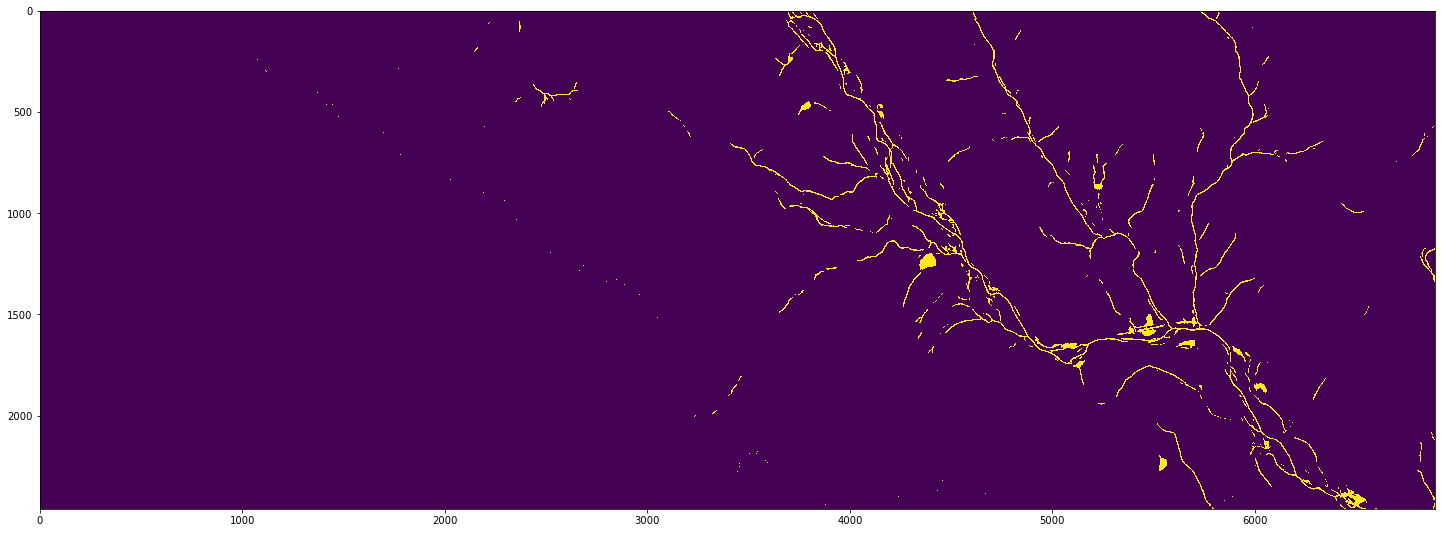

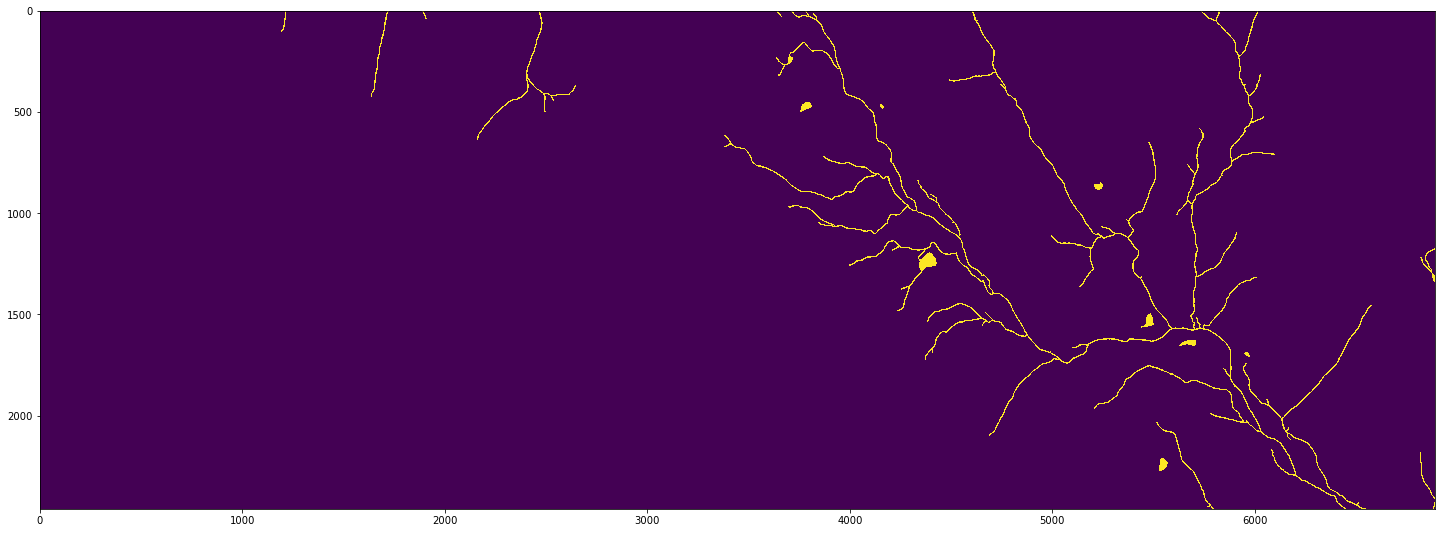

In [52]:
# reference_mask = np.load('./Prediction_results/new_test_data/img/remove_border_mask.npy')
# print(reference_mask)
# fig= plt.figure(figsize=(25,10))
# plt.imshow(reference_mask, interpolation='nearest')
# plt.show()

# reference = np.load('./Prediction_results/new_test_data/img/reference.npy')
# fig= plt.figure(figsize=(25,10))
# plt.imshow(reference, interpolation='nearest')
# plt.show()

# predicted_flatten = predicted.flatten()
# reference_flatten = reference.flatten()

# print(predicted[predicted==1])
# print(reference)
# print(predicted_flatten)
# print(reference_flatten)

predicted = np.load('./Prediction_results/new_test_data/img/40/prediction_result__fine_tuning_No_NAIP_40_samples_r1_.npy')
fig= plt.figure(figsize=(25,10))
# predicted[reference_mask==1]=0
plt.imshow(predicted, interpolation='nearest')
plt.show()

reference_mask = np.load('./Prediction_results/new_test_data/img/reference.npy')
fig= plt.figure(figsize=(25,10))
plt.imshow(reference_mask, interpolation='nearest')
plt.show()
